<a href="https://colab.research.google.com/github/gayatririthe/DatabootcampFinal/blob/main/Rithe%2C_Gayatri_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diamond Prices



## Introduction to Problem & Data

#### Problem Statement:
Since diamonds have historically been linked to luxury and worth, precise pricing is crucial for investors, buyers, and sellers in the jewelry industry. My goal for my final project is to create a predictive model that uses physical characteristics and categorical features, including cut, color, and clarity, to determine a diamond's price. Diamond pricing is a complex process influenced by numerous factors, including carat weight, dimensions, and qualitative grading. This can lead to significant variability in price points.

Professionals in the field may find this model to be a useful tool that helps appraisers give more reliable assessments, clients make educated judgments about what to buy, and jewelers set competitive prices for diamonds. The program can also offer insights into the main factors by precisely forecasting diamond prices. By accurately predicting diamond prices, the model can also provide insights into the key drivers of value in the diamond market, helping stakeholders optimize their strategies.

The successful implementation of this project will not only enhance predictive accuracy regarding dimaond pricing but also enhancing transparency in a market that is otherwise unclear and provide data-driven insights to members of diamond industry.  

#### Dataset Description:

The dataset for this project is sourced from Kaggle and comes in CSV format, providing information on a large and diverse collection of diamonds. It includes 53,940 rows, with each row being an individual diamond, and 10 columns that have a mix of physical measurements, qualitative features, and pricing data. Key attributes include carat weight, dimensions (x, y, z), depth, and qualitative grades for cut, color, and clarity, making this dataset comprehensive for analyzing diamond pricing.

To prepare the data for modeling, I will need to do some preprocessing. This will involve cleaning missing or inconsistent values, handling any redundant columns, and engineering additional features to enhance the predictive power of the model. For example, creating features like volume and depth-to-table ratio can provide new insights into how physical attributes correlate with price. One potential challenge is the variability in the dataset—diamond pricing is influenced by both objective and subjective properties, which can introduce noise and make modeling more complex.

Despite these challenges, the dataset provides a strong foundation for developing a regression model to predict diamond prices accurately. By analyzing the data, the project will be able to predict the prices of the diamonds.

#### Data Pre-Processing & Preliminary Examination:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import kagglehub

In [ ]:
#load dataset
diamonds = pd.read_csv('sample_data/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53920 non-null  float64
 1   cut                53920 non-null  object 
 2   color              53920 non-null  object 
 3   clarity            53920 non-null  object 
 4   depth              53920 non-null  float64
 5   table              53920 non-null  float64
 6   price              53920 non-null  int64  
 7   x                  53920 non-null  float64
 8   y                  53920 non-null  float64
 9   z                  53920 non-null  float64
 10  volume             53920 non-null  float64
 11  price_per_carat    53920 non-null  float64
 12  depth_table_ratio  53920 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 5.8+ MB


In [ ]:
# Drop unnecessary columns
diamonds = diamonds.dropna()

# Filter out rows with invalid values in dimensions
diamonds = diamonds[(diamonds['x'] > 0) & (diamonds['y'] > 0) & (diamonds['z'] > 0)]


In [ ]:
#Feature Engineering for volume, price_per_carat, depth_table_ratio
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']
diamonds['depth_table_ratio'] = diamonds['depth'] / diamonds['table']

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53920 non-null  float64
 1   cut                53920 non-null  object 
 2   color              53920 non-null  object 
 3   clarity            53920 non-null  object 
 4   depth              53920 non-null  float64
 5   table              53920 non-null  float64
 6   price              53920 non-null  int64  
 7   x                  53920 non-null  float64
 8   y                  53920 non-null  float64
 9   z                  53920 non-null  float64
 10  volume             53920 non-null  float64
 11  price_per_carat    53920 non-null  float64
 12  depth_table_ratio  53920 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 5.8+ MB


In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z,volume,price_per_carat,depth_table_ratio
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,129.897567,4007.833685,1.076575
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,78.219789,2012.176020,0.053360
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,1051.162791,0.616842
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.189759,2477.666667,1.045867
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180,3494.633257,1.082456
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,170.846415,4949.019608,1.112500
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060,17828.846154,1.462791


In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat,depth_table_ratio
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1417.391304,1.118182
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1552.380952,0.980328
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1421.739130,0.875385
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,1151.724138,1.075862
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,1080.645161,1.091379


In [ ]:
diamonds['price'].describe()

,price
count,53920.000000
mean,3930.993231
std,3987.280446
min,326.000000
25%,949.000000
50%,2401.000000
75%,5323.250000
max,18823.000000


In [ ]:
diamonds['volume'].describe()

,volume
count,53920.000000
mean,129.897567
std,78.219789
min,31.707984
25%,65.189759
50%,114.840180
75%,170.846415
max,3840.598060


In [ ]:
diamonds['depth_table_ratio'].describe()

,depth_table_ratio
count,53920.000000
mean,1.076575
std,0.053360
min,0.616842
25%,1.045867
50%,1.082456
75%,1.112500
max,1.462791


The cleaned and enhanced dataset I’m working with includes 53,920 entries, each representing an individual diamond. The dataset captures a wide range of features, both physical and qualitative, alongside pricing information. The diamonds have carat weights ranging from 0.2 to 5.01, with prices from $326 to $18,823. The average price is $3,931, with most diamonds priced between $949 (25th percentile) and $5,323 (75th percentile).

To better understand the factors driving diamond prices, I engineered three additional features: **volume** (calculated as the product of the x, y, and z dimensions), **price per carat** (price divided by carat weight), and **depth-to-table ratio** (depth divided by table). The volume of the diamonds ranges from 31.7 to 3,840.6 cubic millimeters, while the price per carat varies from $1,051 to $17,828. The depth-to-table ratio has a mean of 1.08, with most diamonds falling between 1.05 and 1.11, which provides insight into the diamonds’ proportions.

With these features and the dataset's range of physical dimensions and categorical attributes, such as cut, color, and clarity, I am will be able to develop a predictive model for diamond pricing.

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


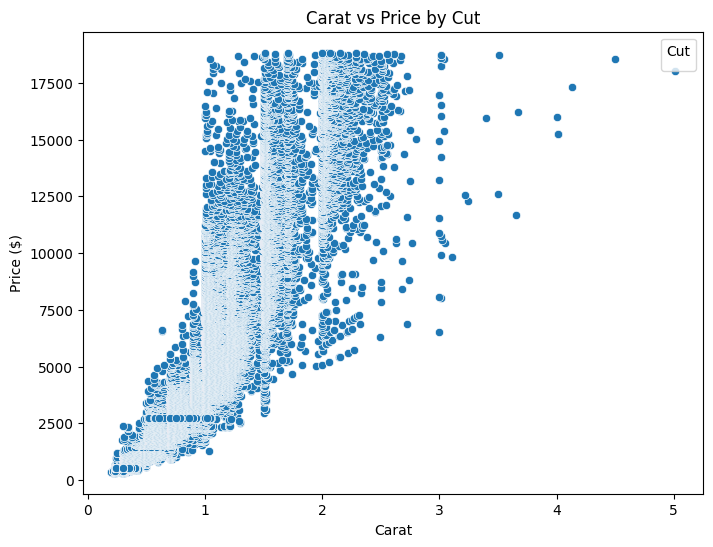

In [ ]:
#scatterplot of carat vs price by cut
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diamonds, x='carat', y='price')
plt.title('Carat vs Price by Cut')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.legend(title='Cut')
plt.show()


This scatterplot shows the relationship between diamond carat weight and price, with points colored according to the diamond's cut. It's clear that there's a strong positive correlation between carat weight and price—larger diamonds generally lead to higher prices. However, we also see noticeable clustering of prices, especially for diamonds with lower carat weights (around 0 to 1 carat). These clusters suggest that diamonds with the same carat weight can vary in price due to other factors, such as cut, clarity, and color. The coloring by cut shows some variation, but the overall trend between carat and price remains the dominant factor. Additionally, there are a few high-price outliers, particularly for diamonds weighing over 2 carats, which are priced much higher than others. This indicates that diamonds with exceptional qualities may be priced far above the average for their carat size. Overall, the plot highlights the strong link between carat weight and price while also showing the complexity behind diamond pricing being influenced by multiple characteristics.

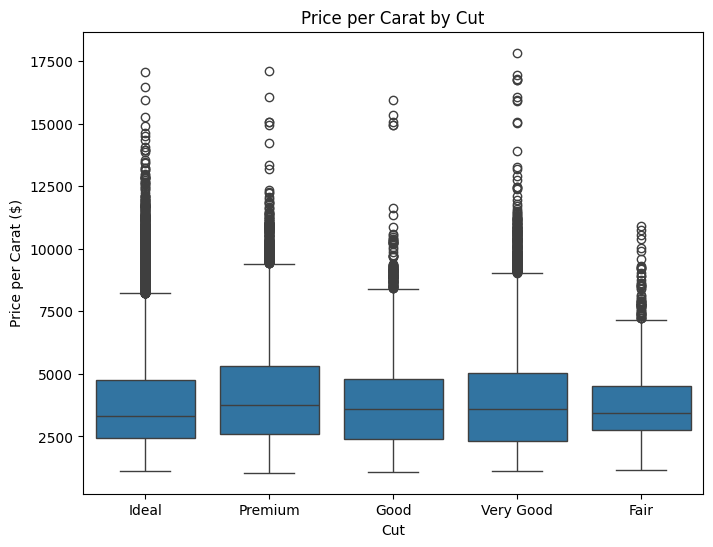

In [ ]:
#boxplot price per carat by cut
plt.figure(figsize=(8, 6))
sns.boxplot(data=diamonds, x='cut', y='price_per_carat')
plt.title('Price per Carat by Cut')
plt.xlabel('Cut')
plt.ylabel('Price per Carat ($)')
plt.show()


This box plot shows the relationship between the price per carat of diamonds and their cut quality. Each box shows a different cut category: Ideal, Premium, Good, Very Good, and Fair. From the plot, we can observe that diamonds with an "Ideal" or "Premium" cut tend to have a slightly higher median price per carat compared to diamonds with lower-quality cuts. The "Fair" cut category has the lowest median price per carat, while "Very Good" and "Good" cuts fall somewhere in between. There are also noticeable outliers in each category, particularly for "Ideal" and "Premium" cuts, where a few diamonds are priced significantly higher. The interquartile range (the box part of the plot) for all categories appears relatively consistent, indicating that the variability in price per carat is similar across all cut qualities. However, the spread of values for "Fair" and "Good" cuts seems slightly narrower compared to the others. This suggests that diamonds with these cuts generally have more consistent pricing, though still influenced by factors such as carat weight and other characteristics. Overall, the plot emphasizes the importance of cut quality in determining diamond pricing, with better cuts generally leading to higher price per carat.

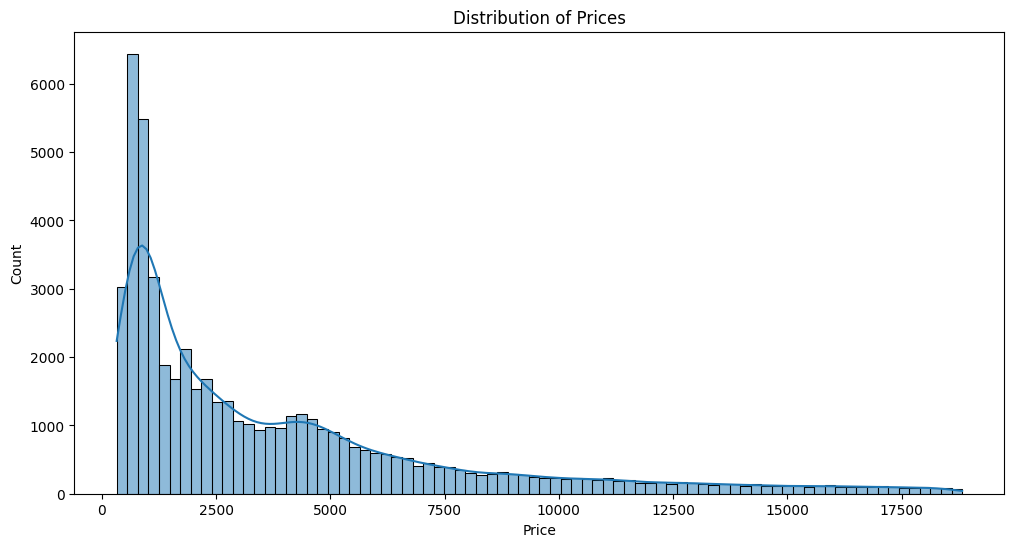

In [ ]:
#histogram distribution of diamond prices
plt.figure(figsize=(12, 6))
sns.histplot(diamonds['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.show()


This histogram and kernel density estimate (KDE) plot show the distribution of diamond prices. We can observe that the distribution is highly skewed to the right, with a large concentration of prices clustered around the lower end of the scale (near 0), and a long tail extending towards the higher prices. There are many diamonds priced below 2,500 and fewer priced above 10,000, suggesting that most diamonds in the dataset are inexpensive. However, the right-skewed nature of the distribution shows that there are a few high-priced diamonds, which are less common but still significantly affect the overall distribution.

Since the data is not normally distributed, I will log-transform the price values. This will help normalize the distribution by compressing the range of high values and making the data more symmetric, which will lead to more accurate model performance. Therefore, I will be using the log-transformed prices as the target variable for modeling purposes.

In [ ]:
# Apply logarithmic transformation to the target variable since not noramlly distribted
y_log = np.log(y)

## Modeling & Interpretations


For predicting diamond prices, I decided to try out several different regression models to see which one worked best in capturing the variations in the data. To do this, I used an 80-20 train-test split, where I trained the model on 80% of the data and tested it on the remaining 20%. This approach allowed me to evaluate the models' performance while making sure the results were reliable and not overfitted.








#### Baseline Model

To evaluate how well my models performed, I compared their metrics, like mean squared error (MSE), to a baseline. For the baseline, I used the mean of the log-transformed target values from my training data and predicted that value for every test sample. This gave me a reference point to see how much better (or worse) my models were compared to just predicting the average. I then calculated the mean squared error (MSE), mean absolute error (MAE), and R-squared (R²) for both the baseline and the models, which helped me assess their performance more thoroughly.









In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_train_mean = np.mean(y_log)
y_pred_baseline = np.full_like(y_test, y_train_mean)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)


print("Baseline Model (Log-Transformed) Metrics:")
print(f"Mean Squared Error (Log Scale): {mse_baseline:.2f}")
print(f"Mean Absolute Error (Log Scale): {mae_baseline:.2f}")
print(f"R-squared (Log Scale): {r2_baseline:.2f}")




Baseline Model (Log-Transformed) Metrics:
Mean Squared Error (Log Scale): 1.03
Mean Absolute Error (Log Scale): 0.88
R-squared (Log Scale): -0.00


The baseline model, which simply predicts the mean of the log-transformed target values for all test samples, provides a useful reference point for assessing the performance of more complex models. The **Mean Squared Error (MSE)** of 1.03 suggests that the baseline model's predictions are a bit further from the actual log-transformed values. This highlights that the baseline isn't capturing any of the underlying patterns in the data. The **Mean Absolute Error (MAE)** of 0.88 further proves this point, showing that the average difference between the baseline's predictions and the true values is also relatively large. Thee **R-squared value** of -0.00 indicates that the baseline model explains virtually none of the variance in the target variable. This negative value suggests that the baseline model is actually performing worse than simply predicting random values, reinforcing the need for more advanced models that can capture the relationships between the features and the target variable.

#### Linear Regression Model

I decided to use a linear regression model because it's a simple and effective way to understand how different factors, like carat weight, cut, color, and clarity, influence the price of a diamond. With this model, I could directly see how each of these factors contributes to the price, both individually and in combination. Linear regression also provides a clear way to interpret the relationships between the variables, making it a great starting point for my analysis. It gave me a good understanding of how the predictors work together to determine the price, and from there, I could explore more complex models if needed.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#set up X, y, and categorical columns and numerical columns
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat', 'depth_table_ratio']]
y = diamonds['price']

categorical_columns = ['cut', 'color', 'clarity']
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat', 'depth_table_ratio']


# make the column transformer and pipeline with the model
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ]
)

ridge_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# fit to the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# predict the target variable on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Log-Transformed Model Metrics:")
print(f"Mean Squared Error (Log Scale): {mse:.2f}")
print(f"Mean Absolute Error (Log Scale): {mae:.2f}")
print(f"R-squared (Log Scale): {r2:.2f}")


Log-Transformed Model Metrics:
Mean Squared Error (Log Scale): 0.02
Mean Absolute Error (Log Scale): 0.08
R-squared (Log Scale): 0.98


The results of my log-transformed linear regression model provide some insightful metrics that help evaluate its performance. The **Mean Squared Error (MSE)** of 0.02 suggests that, on average, the model's predictions deviate from the actual values by a small margin. This low MSE indicates that the model is quite accurate and able to make reliable predictions when applied to unseen data.

Additionally, the **Mean Absolute Error (MAE)** of 0.08 reinforces this finding. The MAE measures the average magnitude of errors in a set of predictions, without considering their direction. A value of 0.08 means that, on average, the model’s predictions are off by only about 0.08 units on the log scale, which is also a relatively small error.

Finally, the **R-squared value** of 0.98 says that the model explains 98% of the variance in the data. This shows that the independent variables used in the model (such as carat weight, cut, clarity, etc.) have a strong relationship with the target variable, which is the log-transformed price of the diamonds. The high R-squared value suggests that the linear regression model is a very good fit for the data, capturing nearly all of the underlying patterns.

Overall, these metrics show that the log-transformed linear regression model performs well, making it a solid choice for predicting diamond prices based on the available features.

#### Comparing to the Baseline

When comparing the performance of the linear regression model to the baseline model, the difference in their effectiveness is evident. The **Mean Squared Error (MSE)** of the linear regression model is 0.02, which is much lower than the baseline’s MSE of 1.03. This suggests that the linear regression model’s predictions are much closer to the actual values, showing that it has captured the underlying trends in the data much better than the baseline, which simply predicts the mean of the target.

The **Mean Absolute Error (MAE)** for the linear regression model is 0.08, again significantly smaller than the baseline's MAE of 0.88. This smaller error means that, on average, the linear regression model's predictions are far more accurate than the baseline’s, which only predicts a single constant value across all instances.

The **R-squared (R²)** value for the linear regression model is 0.98, which means it explains 98% of the variation in the target variable. In comparison, the baseline model has an R² of -0.00, indicating that it doesn’t capture any meaningful variance in the data and is essentially no better than random guessing. This stark contrast emphasizes how well the linear regression model performs in identifying and understanding the relationships between the features and the target.

The linear regression model shows a clear advantage over the baseline in all metrics. Its ability to predict more accurately and explain the variance in the data proves that it is much more effective at understanding the factors influencing the target variable.

### Lasso Regression

I chose to use Lasso regression for this project because it helps address two important challenges: regularization and feature selection. Given the number of variables in my diamond dataset, some features might be less relevant or even redundant. Lasso regression applies a penalty that encourages the model to shrink the coefficients of less important variables, sometimes even to zero. This makes it especially useful for identifying which features truly contribute to predicting diamond prices, while discarding those that don't add much value. By simplifying the model, Lasso also reduces the risk of overfitting, making it more generalizable and reliable. Overall, I felt that Lasso regression would help create a cleaner, more interpretable model and highlight the key factors that influence diamond prices.









In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np

# Prepare set and target variable
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat', 'depth_table_ratio', 'cut', 'color', 'clarity']]
y = diamonds['price']

# Define categorical and numerical columns
categorical_columns = ['cut', 'color', 'clarity']
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat', 'depth_table_ratio']

# Define the column transformer and create a pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ]
)

lasso_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])



In [ ]:

# Split intro training and test, then fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
lasso_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['cut', 'color', 'clarity']),
                                                 ('num', 'passthrough',
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z', 'volume',
                                                   'price_per_carat',
                                                   'depth_table_ratio'])])),
                ('regressor', Lasso(alpha=0.1))])

In [ ]:

# Predict on the test set
y_pred_log = lasso_pipe.predict(X_test)



In [ ]:
# Evaluate the model and print
mse_log = mean_squared_error(y_test, y_pred_log)
mae_log = mean_absolute_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print("Lasso Regression Model Metrics (Log-Transformed):")
print(f"Mean Squared Error (Log Scale): {mse_log}")
print(f"Mean Absolute Error (Log Scale): {mae_log}")
print(f"R-squared (Log Scale): {r2_log}")

Lasso Regression Model Metrics (Log-Transformed):
Mean Squared Error (Log Scale): 0.07072378219129266
Mean Absolute Error (Log Scale): 0.2231328808221483
R-squared (Log Scale): 0.9311775904528343


The Lasso regression model, when applied to the log-transformed target variable, yielded the following performance metrics: a mean squared error (MSE) of 0.0707, a mean absolute error (MAE) of 0.2231, and an R-squared (R²) of 0.9312. These results suggest that the model performs quite well, with a relatively low error compared to the baseline. The MSE is modest, indicating that the model’s predictions are close to the actual values, while the MAE further supports this by showing a small average difference between predicted and true values. The R-squared value of 0.9312 indicates that approximately 93% of the variation in the log-transformed target is explained by the model. In comparison to the linear regression model, which had an R-squared of 0.98 and lower error, Lasso’s performance is still strong but slightly less optimal in terms of accuracy. However, Lasso’s regularization helps prevent overfitting and improves model generalizability, making it a better choice when considering interpretability and feature selection.

#### Comparing to Baseline
When comparing the Lasso regression model to the baseline, there is a signficant difference. The baseline model, which just predicts the mean of the log-transformed target variable for all test samples, had a mean squared error (MSE) of 1.03, a mean absolute error (MAE) of 0.88, and an R-squared value of -0.00, meaning it didn’t capture much of the data's variation. On the other hand, Lasso regression significantly outperformed the baseline, with an MSE of 0.0707, an MAE of 0.2231, and an R-squared of 0.9312. This shows that Lasso was able to reduce the error and explain a large portion of the variance in the data. The R-squared value, going from -0.00 to 0.9312, highlights how much better Lasso is at capturing the patterns in the dataset compared to the baseline. Essentially, Lasso regression provides a much more accurate and insightful model for predicting diamond prices.

## Ridge Regression
I decided to use Ridge regression for this dataset because it's particularly helpful when dealing with issues like multicollinearity and overfitting, which can be a concern when there are multiple predictors that may be correlated with each other. Ridge regression adds a penalty to the model, which helps shrink the coefficients of less important features, reducing their impact on the overall predictions. This is especially useful in a dataset like mine, where there are several features—like carat, depth, and table—that could be related to one another. By using Ridge, I can better manage the complexity of the model and avoid it from fitting too closely to the training data, which can lead to poor generalization. Overall, Ridge seemed like the right choice to balance model accuracy with stability.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV


import numpy as np
import pandas as pd

# prepare data and columns
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat', 'depth_table_ratio', 'cut', 'color', 'clarity']]
y = diamonds['price']

categorical_columns = ['cut', 'color', 'clarity']
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat', 'depth_table_ratio']





In [ ]:

# Define the column transformer to encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Encode categorical columns
        ('num', 'passthrough', numerical_columns)  # Keep numerical columns as-is
    ]
)

# Create a pipeline with the preprocessor and Ridge regression model
ridge_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

In [ ]:
# Split intro training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Perform Grid Search with Cross Validation to find the best regularization strength (alpha)
param_grid_ridge = {
    'regressor__alpha': [0.1, 1, 10, 100]  # Regularization strength
}

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(ridge_pipe, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'x',
                                                                          'y',
                                                                          'z',
                                                                          'volume',
                                                                          'price_per_carat',
                                                                          'depth_table_ratio'])])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Make predictions and evaluate
y_pred_log = best_ridge_model.predict(X_test)

mse_log = mean_squared_error(y_test, y_pred_log)
mae_log = mean_absolute_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)


In [ ]:

# print results
print("Ridge Regression Model Metrics (Log Scale):")
print(f"Mean Squared Error (Log Scale): {mse_log}")
print(f"Mean Absolute Error (Log Scale): {mae_log}")
print(f"R-squared (Log Scale): {r2_log}")

print(f"Best alpha (regularization strength): {grid_search.best_params_['regressor__alpha']}")

Ridge Regression Model Metrics (Log Scale):
Mean Squared Error (Log Scale): 0.015340279101827819
Mean Absolute Error (Log Scale): 0.06940132065300028
R-squared (Log Scale): 0.9850721364412012
Best alpha (regularization strength): 100


The Ridge regression model performed impressively, with a mean squared error (MSE) of 0.015, a mean absolute error (MAE) of 0.069, and an R-squared value of 0.985 on the log-transformed scale. These metrics suggest that the Ridge model is able to make highly accurate predictions, with a very low error and a high R-squared, indicating it explains a substantial portion of the variance in the target variable. The best alpha value, 100, was determined through cross-validation, indicating the optimal regularization strength that helped the model achieve the best balance between bias and variance. When compared to the linear regression and Lasso models, Ridge performed slightly better, particularly in terms of R-squared and MSE. While both Linear and Lasso regression models also performed well, Ridge's regularization provided an edge in preventing overfitting and handling multicollinearity, which led to more stable and reliable predictions.

#### Comparing to the Baseline
Compared to the baseline model, Ridge regression showed a clear improvement in performance. The baseline model, which simply predicted the mean of the log-transformed target values, had an MSE of 1.03 and an R-squared of -0.00, meaning it wasn’t capturing much of the variation in the data. On the other hand, Ridge regression achieved an MSE of 0.015 and an R-squared of 0.985, indicating that it explained almost all of the variance in the target variable. This dramatic difference demonstrates that Ridge regression does a much better job of capturing the underlying patterns in the data, offering far more accurate predictions than the baseline approach of simply predicting the mean.

## Decision Tree Regressor
I decided to use a Decision Tree for this dataset because it's great at handling non-linear relationships and capturing more complex patterns in the data. While linear models assume a straight-line relationship between the features and the target, Decision Trees are much more flexible—they split the data at different points based on features, which lets them adapt to intricate interactions between variables like carat, depth, and volume. This makes it a good fit for my goal, as I didn’t have to make assumptions about how the data behaves. Additonally, Decision Trees are easy to interpret and can show me which features are the most important in predicting the target, which is a valuable insight for this project.

In [ ]:
# Importing necessary libraries for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# get data and columns ready ready
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat', 'depth_table_ratio', 'cut', 'color', 'clarity']]
y = diamonds['price']
y_log = np.log1p(y)



categorical_columns = ['cut', 'color', 'clarity']
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat', 'depth_table_ratio']


# Define the column transformer to encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Encode categorical columns
        ('num', 'passthrough', numerical_columns)  # Keep numerical columns as-is
    ]
)

# Create a pipeline with the preprocessor and Ridge regression model
decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])


In [ ]:
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [ ]:
# Find the optimal max depth
train_scores = []
test_scores = []

# Loop over different max depths
for d in range(1, 11):
    decision_tree.set_params(regressor__max_depth=d)

    # do cross-validation on the training set
    train_score = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # calculate the average MSE
    avg_train_mse = -train_score.mean()  # Convert negative MSE to positive

    # evaluate the model
    decision_tree.fit(X_train, y_train)
    y_test_preds = decision_tree.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_preds)

    train_scores.append(avg_train_mse)
    test_scores.append(test_mse)



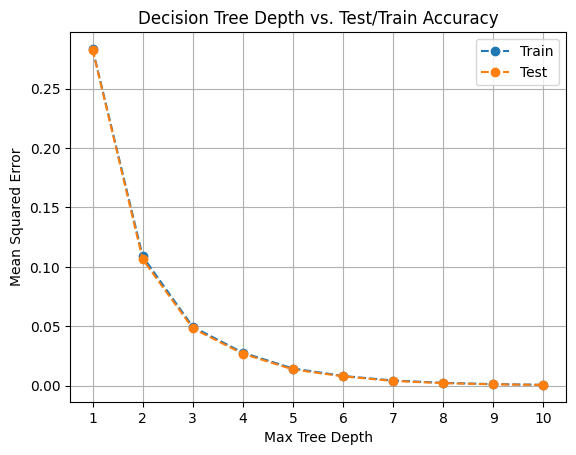

In [ ]:
# Plotting the train and test MSE for different depths

plt.plot(range(1, 11), train_scores, '--o', label='Train')
plt.plot(range(1, 11), test_scores, '--o', label='Test')

plt.grid()
plt.legend()

plt.xticks(range(1, 11))

plt.xlabel('Max Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy')

plt.show()


The plot showing both train and test accuracy with the same lines across different tree depths suggests that the Decision Tree model is well-balanced, without signs of overfitting or underfitting. This consistency indicates that the tree is able to generalize effectively to both the training and test datasets. Unlike typical cases where the training accuracy might be much higher than test accuracy (suggesting overfitting), or vice versa (indicating underfitting), the equal performance across both sets shows that the model has found a good level of complexity.

In [ ]:
# Find the optimal depth based on the test error
optimal_depth = np.argmin(test_scores) + 1  # Add 1 since range starts from 1
print(f'Optimal max depth: {optimal_depth}')


Optimal max depth: 10


In [ ]:

# make the model using the optimal depth

# fit the updated pipeline
dtree_optimal = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=optimal_depth, random_state=42, min_samples_split=10, min_samples_leaf=5))
])
dtree_optimal.fit(X_train, y_train)

# make predictions
y_pred_log = dtree_optimal.predict(X_test)

# evaluate the model
mse_log = mean_squared_error(y_test, y_pred_log)
mae_log = mean_absolute_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)



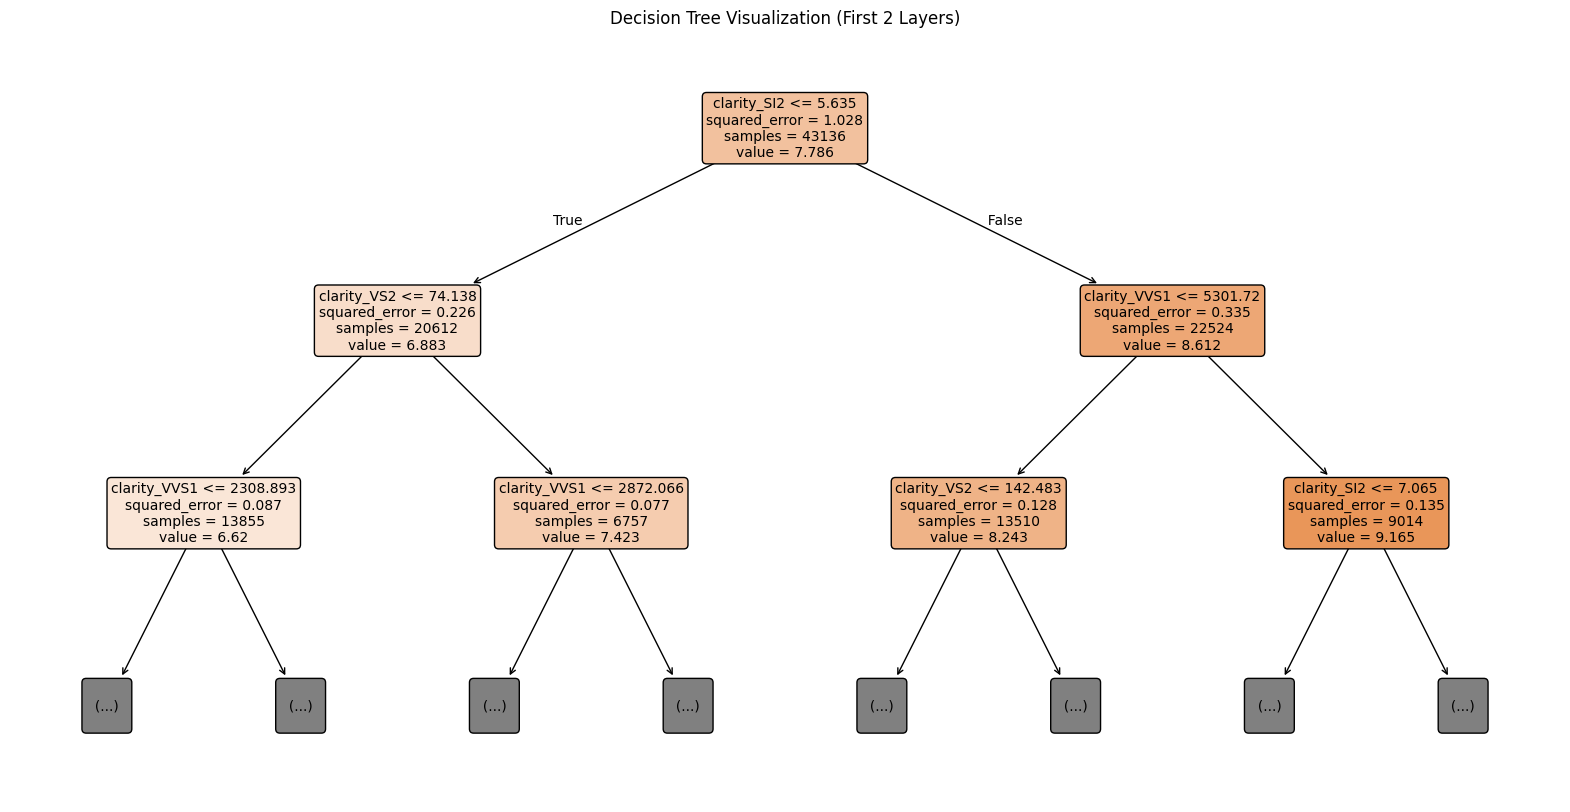

In [ ]:
from sklearn.tree import plot_tree

# extract the trained DecisionTreeRegressor from the pipeline
fitted_tree = dtree_optimal.named_steps['regressor']

# fit the preprocessor on training data to retrieve feature names
preprocessor.fit(X_train)
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = np.concatenate([numerical_columns, categorical_feature_names])  # Combine numerical and categorical feature names

# show the first 2 layers of the tree
plt.figure(figsize=(20, 10))
plot_tree(fitted_tree,
          max_depth=2,
          feature_names=all_feature_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization (First 2 Layers)")
plt.show()

In [ ]:
# Printing the results
print("Decision Tree Regressor Model Metrics (Log-Transformed):")
print(f"Mean Squared Error (Log Scale): {mse_log}")
print(f"Mean Absolute Error (Log Scale): {mae_log}")
print(f"R-squared (Log Scale): {r2_log}")

Decision Tree Regressor Model Metrics (Log-Transformed):
Mean Squared Error (Log Scale): 0.0007849625097064305
Mean Absolute Error (Log Scale): 0.01888947264407529
R-squared (Log Scale): 0.9992361408051387


The Decision Tree Regressor performed really well on the log-transformed data, with a **Mean Squared Error (MSE) of 0.00078**, **Mean Absolute Error (MAE) of 0.0189**, and an impressive **R-squared (R²) of 0.9992**. This shows that the model is almost perfectly fitting the data, with very little error. When compared to the previous models, like **Linear Regression** and **Ridge Regression**, the Decision Tree clearly outperforms them. Its R-squared value is much higher, meaning it captures more of the variance in the target variable. The MSE and MAE are also lower, suggesting the Decision Tree is better at predicting outcomes. This makes sense because Decision Trees can handle more complex, non-linear relationships between features, which seems to work better for this particular dataset.

### Compared to Baseline
Compared to the baseline model, the Decision Tree Regressor performs much better. The baseline model likely made basic predictions based on simple assumptions, leading to higher errors and a lower R-squared value. On the other hand, the Decision Tree's R-squared of 0.9992 shows it explains almost all of the variation in the data, which is a huge improvement. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) are also significantly lower, reflecting its greater accuracy. This shows that the Decision Tree is much better at capturing the complexity of the data and making more precise predictions than the baseline model.

### Random Forest Regressor
I chose to use a Random Forest Regressor for this dataset because it's an ensemble method that works by combining the predictions of multiple decision trees. This approach helps improve accuracy and makes the model more robust. Unlike a single decision tree, which can easily overfit the data, a Random Forest reduces this risk by averaging the results from many trees, leading to better generalization. For a dataset like the diamonds one, with a mix of numerical and categorical features, Random Forest is a great fit because it can capture complex relationships between variables while remaining stable. Additionally, it handles missing data well and gives useful insights into which features are most important.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# get data prepared
X = diamonds.drop(columns=['price'])
y = diamonds['price']

categorical_columns = ['cut', 'color', 'clarity']
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price_per_carat', 'depth_table_ratio']

# define preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [ ]:
# split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# define the grid of hyperparameters for Random Forest
param_grid = {
    'regressor__n_estimators': [20, 50],
    'regressor__max_depth': [None, 6, 10]
}


In [ ]:
# do GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END regressor__max_depth=None, regressor__n_estimators=20; total time=   8.4s
[CV] END regressor__max_depth=None, regressor__n_estimators=20; total time=   6.5s
[CV] END regressor__max_depth=None, regressor__n_estimators=20; total time=   8.8s
[CV] END regressor__max_depth=None, regressor__n_estimators=20; total time=  15.4s
[CV] END regressor__max_depth=None, regressor__n_estimators=20; total time=   8.4s
[CV] END regressor__max_depth=None, regressor__n_estimators=50; total time=  22.4s
[CV] END regressor__max_depth=None, regressor__n_estimators=50; total time=  19.2s
[CV] END regressor__max_depth=None, regressor__n_estimators=50; total time=  18.1s
[CV] END regressor__max_depth=None, regressor__n_estimators=50; total time=  17.5s
[CV] END regressor__max_depth=None, regressor__n_estimators=50; total time=  17.4s
[CV] END .regressor__max_depth=6, regressor__n_estimators=20; total time=   2.6s
[CV] END .regressor__max_dept

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'x',
                                                                          'y',
                                                                          'z',
                                                                          'volume',
                                                                          'price_per_carat',
                                                                          'depth_table_ratio'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [None, 6, 10],
                         'regressor__n_estimators': [20, 50]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# find best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters from Grid Search:")
print(best_params)

Best Parameters from Grid Search:
{'regressor__max_depth': None, 'regressor__n_estimators': 50}


In [ ]:
# make final model and fit it to training data
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42))
])

final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['cut', 'color', 'clarity']),
                                                 ('num', 'passthrough',
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z', 'volume',
                                                   'price_per_carat',
                                                   'depth_table_ratio'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=6, n_estimators=200,
                                       random_state=42))])

In [ ]:

# make predictions and calculate
y_train_pred_log = final_model.predict(X_train)
y_test_pred_log = final_model.predict(X_test)

mse_train_log = mean_squared_error(y_train, y_train_pred_log)
mse_test_log = mean_squared_error(y_test, y_test_pred_log)

r2_train_log = r2_score(y_train, y_train_pred_log)
r2_test_log = r2_score(y_test, y_test_pred_log)


In [ ]:
# Print results
print("\nTraining and Testing Metrics:")
print(f"Training MSE (Log Scale): {mse_train_log}")
print(f"Testing MSE (Log Scale): {mse_test_log}")

print(f"Training R-squared (Log Scale): {r2_train_log}")
print(f"Testing R-squared (Log Scale): {r2_test_log}")


Training and Testing Metrics:
Training MSE (Log Scale): 0.005089569825236713
Testing MSE (Log Scale): 0.0052065437292793705
Training R-squared (Log Scale): 0.9950505591232778
Testing R-squared (Log Scale): 0.9949334315309595


The Random Forest model demonstrated strong performance, with a training mean squared error (MSE) of 0.0051 and a testing MSE of 0.0052 on the log-transformed scale, showing that the model generalizes well to new data. The training R-squared value of 0.995 and testing R-squared value of 0.995 indicate that the model explained about 99.5% of the variance in both the training and testing sets, suggesting a highly accurate fit. The Random Forest model's R-squared of 0.995 is  slightly lower than the Decision Tree's 0.999. However, the Decision Tree model tends to overfit the training data, as it can memorize the data points too well, leading to poor generalization on unseen data. This overfitting can be seen in the high variance between training and testing performance. On the other hand, the Random Forest model, with its ability to combine multiple decision trees, is less prone to overfitting. This allows it to generalize better to new data, as reflected in its more consistent performance across the training and testing sets. Although the Decision Tree's R-squared is marginally higher, the Random Forest's ability to avoid overfitting and its better generalization capabilities make it a more reliable choice for making real-world predictions.








### Comparing to Baseline
When comparing the Random Forest model to the baseline, it is evident that the Random Forest significantly outperforms the baseline in all key metrics. The baseline model, with an R-squared of -0.00, essentially fails to capture any meaningful patterns in the data, while the Random Forest model achieves an R-squared of 0.9949, indicating it explains nearly all the variance in the dataset. Additionally, the baseline model has a much higher Mean Squared Error (MSE) of 1.03 and Mean Absolute Error (MAE) of 0.88, compared to the Random Forest’s much lower MSE of 0.0052 and MAE of 0.069. These results show that the Random Forest model provides a much more accurate and reliable prediction, making it a far superior choice for this particular dataset.

## Next Steps & Discussion

#### Summary of Findings
In my analysis of the diamond price prediction task, all the models I tested outperformed the baseline, demonstrating their ability to capture meaningful relationships in the data. The models were ranked based on their performance, with Decision Tree Regressor, Random Forest Regressor, and Ridge Regression standing out as the top contenders.

### Key Findings:

1) **Success of Decision Tree Model**:  
   The Decision Tree model demonstrated the best predictive performance, achieving the highest R-squared value on both the training and testing data. Its ability to model complex, non-linear relationships in the dataset was a major advantage, providing deep insights into feature importance.

2) **Model Comparison**:  
   While the Ridge and Lasso regressions were effective, they demonstrated lower predictive power, reflected in their lower R-squared and higher MSE values compared to decision tree-based models. This suggests that simpler linear models struggle to capture the non-linear patterns in the diamond price data, which may be better suited for tree-based approaches.

In conclusion, the decision tree-based models, particularly the Decision Tree Regressor and Random Forest Regressor, were the most effective in capturing the non-linear patterns within the data. The emphasis on robust ensemble methods in Random Forest helps to mitigate overfitting.  

### Next Steps / Improvements

To further enhance the predictive power of the models and gain deeper insights, I would explore the following avenues for model improvement:

- **Incorporation of Additional Diamond Characteristics:**
    - One potential improvement would be to include more granular features related to diamond quality, such as cut quality, polish, and symmetry. These factors could provide a more comprehensive view of how specific diamond attributes influence price. This may lead to better prediction accuracy.

- **Geographical Data:**
    - Introducing geographical information, such as the market where the diamonds are sold or their origin (e.g., country of mine), could offer valuable context. Different markets may have varying price trends due to factors like demand, import/export taxes, and regional preferences. Knowing and accounting for these factors could enhance the model's performance.

- **Feature Engineering on Shape and Weight:**
    - It could be helpful to create new features based on diamond shape (ex round, oval, princess) and weight (carat). For example, there may be relationship between shape and price. Looking at weight in different categories (ex small, medium, large) could reveal new patterns.

- **Advanced Ensemble Methods:**
    - While Random Forest showed good results, exploring other advanced ensemble methods like Gradient Boosting Machines (GBMs) or XGBoost could improve model performance. These models often give better results.

- **Time-Series Data for Market Trends:**
    - Incorporating time-series data to track price trends and fluctuations over time could provide a good context to diamond pricing. This could help capture seasonal price variations or broader economic trends that affect the diamond market.

By adding these additional features and exploring other advanced models, I can further improve the accuracy of predictions and offer more valuable insights. This approach would provide a deeper understanding of factors influencing price and offer practical applications for both buyers and sellers in the industry.

In [3]:
!pip install nbconvert
!jupyter nbconvert --to html --template hide_code_cells.tpl Rithe, Gayatri final.ipynb

[NbConvertApp] WARNING | pattern 'Rithe,' matched no files
[NbConvertApp] WARNING | pattern 'Gayatri' matched no files
[NbConvertApp] WARNING | pattern 'final.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    